# Importing and Declarations

import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import sklearn as sk
import tensorflow as tf

In [52]:
print(f"Pandas: {pd.__version__} | NumPy: {np.__version__} | MatPlotLib: {mpl.__version__} | SciPy: {sp.__version__} | Seaborn: {sns.__version__} | Scikit-learn: {sk.__version__} | Tensorflow: {tf.__version__}")

Pandas: 2.0.2 | NumPy: 1.24.3 | MatPlotLib: 3.7.1 | SciPy: 1.10.1 | Seaborn: 0.12.2 | Scikit-learn: 1.2.2 | Tensorflow: 2.13.0


In [2]:
filepath = "data/train.csv"

In [3]:
data = pd.read_csv(filepath)

In [5]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
effective_features = ["CreditScore", "Age", "Balance", "NumOfProducts", "Geography", "Gender", "IsActiveMember"]

In [5]:
continuous_features = [0, 1, 2, 3]
categorical_features = [4, 5]
target = "Exited"

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning Approach

## Data Preprocessing

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data[effective_features], data[target], test_size=0.2, random_state=42, stratify=data[target])

In [9]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown="ignore", drop="if_binary")

## Pipeline

In [10]:
def pipe(model):
    transform = ColumnTransformer([("num", scaler, continuous_features), ("cat", onehot, categorical_features)], remainder="passthrough")
    pipeline = Pipeline(steps=[("transform", transform), ("classifier", model)])
    pipeline.fit(x_train, y_train)

    print(">>> TRAINING DONE\n\n")

    y_pred = pipeline.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("\tPositive\tNegative\t(Predicted)")
    print(f"True\t{tp}\t\t{fn}")
    print(f"False\t{fp}\t\t{tn}")
    print("Actual")
    print("\n+--------------+")
    print("+----Metrics---+")
    print("+--------------+")
    
    print("Accuracy: %.6f" % accuracy_score(y_test, y_pred))
    print("Precision: %.6f" % precision_score(y_test, y_pred))
    print("Recall: %.6f" % recall_score(y_test, y_pred))
    print("F1-score: %.6f" % f1_score(y_test, y_pred))

    print("\n>>> METRICS DONE\n\n")

    cv = StratifiedKFold(n_splits=5)
    
    return np.mean(cross_val_score(pipeline, data[effective_features], data[target], cv=cv, scoring=make_scorer(f1_score)))

## Dummy Classifier

In [24]:
from sklearn.dummy import DummyClassifier

In [25]:
base_model = DummyClassifier(strategy="most_frequent")
print("CV (F1):", pipe(base_model))

>>> TRAINING DONE


	Positive	Negative	(Predicted)
True	0		6984
False	0		26023
Actual

+--------------+
+----Metrics---+
+--------------+
Accuracy: 0.788409
Precision: 0.000000
Recall: 0.000000
F1-score: 0.000000

>>> METRICS DONE




C:\Users\mainm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV (F1): 0.0


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [28]:
print("CV (F1):", pipe(dt_model))

>>> TRAINING DONE


	Positive	Negative	(Predicted)
True	3905		3079
False	1524		24499
Actual

+--------------+
+----Metrics---+
+--------------+
Accuracy: 0.860545
Precision: 0.719285
Recall: 0.559135
F1-score: 0.629179

>>> METRICS DONE


CV (F1): 0.6236146270946257


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model = RandomForestClassifier(n_estimators=50, min_samples_split=5)

In [31]:
print("CV (F1):", pipe(rf_model))

>>> TRAINING DONE


	Positive	Negative	(Predicted)
True	3786		3198
False	1734		24289
Actual

+--------------+
+----Metrics---+
+--------------+
Accuracy: 0.850577
Precision: 0.685870
Recall: 0.542096
F1-score: 0.605566

>>> METRICS DONE


CV (F1): 0.602879388382968


## Stochastic Gradient Descent Classifier

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
sgd = SGDClassifier(max_iter=50)

In [34]:
print("CV (F1):", pipe(sgd))

>>> TRAINING DONE


	Positive	Negative	(Predicted)
True	2558		4426
False	1002		25021
Actual

+--------------+
+----Metrics---+
+--------------+
Accuracy: 0.835550
Precision: 0.718539
Recall: 0.366266
F1-score: 0.485205

>>> METRICS DONE


CV (F1): 0.44469331125144407


## Light Gradient Boosting Model

In [99]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [100]:
import lightgbm as lgb

In [101]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

In [102]:
tfm = ColumnTransformer([("num", scaler, continuous_features), ("cat", onehot, categorical_features)], remainder="passthrough")

In [103]:
lgb_train = lgb.Dataset(tfm.fit_transform(x_tr), y_tr)
lgb_val = lgb.Dataset(tfm.transform(x_val), y_val, reference=lgb_train)

In [104]:
gbm = lgb.train(params, lgb_train, num_boost_round=2000, valid_sets=[lgb_train, lgb_val])

In [105]:
y_pred = gbm.predict(tfm.transform(x_test))

In [106]:
y_pred = np.round(y_pred)

In [107]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("\tPositive\tNegative\t(Predicted)")
print(f"True\t{tp}\t\t{fn}")
print(f"False\t{fp}\t\t{tn}")
print("Actual")
print("\n+--------------+")
print("+----Metrics---+")
print("+--------------+")

print("Accuracy: %.6f" % accuracy_score(y_test, y_pred))
print("Precision: %.6f" % precision_score(y_test, y_pred))
print("Recall: %.6f" % recall_score(y_test, y_pred))
print("F1-score: %.6f" % f1_score(y_test, y_pred))


	Positive	Negative	(Predicted)
True	3844		3140
False	1423		24600
Actual

+--------------+
+----Metrics---+
+--------------+
Accuracy: 0.861757
Precision: 0.729827
Recall: 0.550401
F1-score: 0.627541


# Neural Network Approach

In [13]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform, HeNormal
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
x_t = tfm.fit_transform(x_tr).astype("float64")
x_te = tfm.transform(x_val).astype("float64")

In [83]:
hidden = 96
output = 1

nn_model = Sequential([Dense(units=hidden, input_dim=x_t.shape[1], activation="relu", kernel_initializer=HeNormal),
                       Dropout(0.6),
                       Dense(units=hidden, input_dim=hidden, activation="relu", kernel_initializer=HeNormal),
                       Dropout(0.3),
                       Dense(units=hidden, input_dim=hidden, activation="relu", kernel_initializer=HeNormal),
                       Dense(units=hidden, input_dim=hidden, activation="relu", kernel_initializer=HeNormal),
                       Dropout(0.3),
                       Dense(units=output, input_dim=hidden, activation="sigmoid", kernel_initializer=GlorotUniform)])


In [84]:
opt = Adam(learning_rate=0.05)
early = EarlyStopping(monitor="val_loss", patience=100, restore_best_weights=True)

In [85]:
nn_model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [88]:
history = nn_model.fit(x_t, y_tr.values, epochs=1000, batch_size=5000, validation_data=[x_te, y_val.values], callbacks=[early])

Epoch 1/1000
22/22 [==============================] - 1s 20ms/step - loss: 0.8222 - accuracy: 0.7861 - val_loss: 0.3970 - val_accuracy: 0.8321
Epoch 2/1000
22/22 [==============================] - 0s 16ms/step - loss: 0.4085 - accuracy: 0.8203 - val_loss: 0.3593 - val_accuracy: 0.8533
Epoch 3/1000
22/22 [==============================] - 0s 15ms/step - loss: 0.3789 - accuracy: 0.8380 - val_loss: 0.3404 - val_accuracy: 0.8608
Epoch 4/1000
22/22 [==============================] - 0s 15ms/step - loss: 0.3683 - accuracy: 0.8434 - val_loss: 0.3392 - val_accuracy: 0.8628
Epoch 5/1000
22/22 [==============================] - 0s 15ms/step - loss: 0.3632 - accuracy: 0.8471 - val_loss: 0.3321 - val_accuracy: 0.8634
Epoch 6/1000
22/22 [==============================] - 0s 15ms/step - loss: 0.3591 - accuracy: 0.8506 - val_loss: 0.3302 - val_accuracy: 0.8640
Epoch 7/1000
22/22 [==============================] - 0s 15ms/step - loss: 0.3542 - accuracy: 0.8531 - val_loss: 0.3440 - val_accuracy: 0.8637

In [89]:
loss, accuracy = nn_model.evaluate(tfm.transform(x_test), y_test, verbose=1)
print(f"Accuracy: {accuracy}")
print(f"Loss: {loss}")

1032/1032 [==============================] - 1s 665us/step - loss: 0.3258 - accuracy: 0.8628
Accuracy: 0.8627563714981079
Loss: 0.32581159472465515


In [93]:
y_pred = np.round(nn_model.predict(tfm.transform(x_test), verbose=1))

1032/1032 [==============================] - 1s 526us/step


In [94]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("\tPositive\tNegative\t(Predicted)")
print(f"True\t{tp}\t\t{fn}")
print(f"False\t{fp}\t\t{tn}")
print("Actual")
print("\n+--------------+")
print("+----Metrics---+")
print("+--------------+")

print("Accuracy: %.6f" % accuracy_score(y_test, y_pred))
print("Precision: %.6f" % precision_score(y_test, y_pred))
print("Recall: %.6f" % recall_score(y_test, y_pred))
print("F1-score: %.6f" % f1_score(y_test, y_pred))

	Positive	Negative	(Predicted)
True	3612		3372
False	1158		24865
Actual

+--------------+
+----Metrics---+
+--------------+
Accuracy: 0.862756
Precision: 0.757233
Recall: 0.517182
F1-score: 0.614599


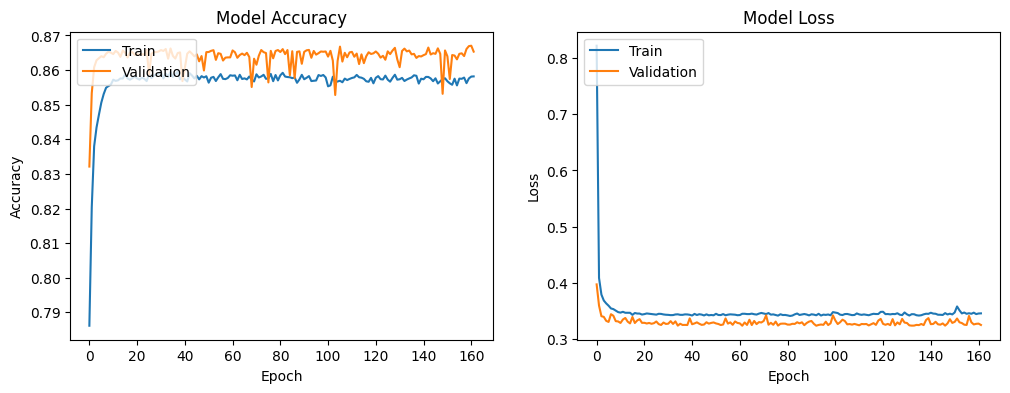

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Save Best Model

In [97]:
modelFileName = 'models/bank.keras'
nn_model.save(modelFileName)

In [108]:
gbm.save_model("./models/model.pkl", num_iteration=gbm.best_iteration)